In [48]:
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import os


load_dotenv()

True

In [49]:
owner = 'liferay'
repo = 'liferay-portal'
token = os.getenv('github_token')


In [50]:
url_to_get_prs_number = f'https://api.github.com/repos/{owner}/{repo}/pulls?q=mergeable:conflicting'

headers = {'Authorization': f'token {token}'}


response = requests.get(url_to_get_prs_number, headers=None)

prs = response.json()

pr_numbers = [pr_number['number'] for pr_number in prs]

for index, pr_number in enumerate(pr_numbers):
    print(index, pr_number)

0 5602
1 5598
2 5592
3 5587
4 5552
5 5524
6 5514
7 5475
8 5474
9 5473
10 5472
11 5471
12 5469
13 5461
14 5453
15 5434
16 5433
17 5422
18 5420
19 5406
20 5395
21 5390
22 5371
23 5344
24 5300
25 5299
26 5298
27 5293
28 5292
29 5274


In [51]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner}/{repo}/pulls/{pr_numbers[12]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_comments = []
cleaned_bodies = []

for body in bodies:
    cleaned_words = [word for word in word_tokenize(body) if word.lower() not in stop_words]
    cleaned_comment = ' '.join(cleaned_words)  # Junte as palavras em uma única string
    cleaned_bodies.append(cleaned_comment)  # Adicione a string à lista
    all_comments.extend(cleaned_words)

print(cleaned_bodies)



#print(all_comments)

['get lazy initialization instead creating ` useEffect ` . `` ` jsx const [ value , setValue ] = useState ( ( ) = > getSettingValue ( defaultValue , sessionClicksValue , key ) ) ; `` `', 'Maybe add directly Clay , pressing ` Enter ` call ` onToggle ` callback .', "could wrong think ` Liferay.detach ` remove listener based function reference , create anonymous function 's different reference ` onOpenChange ` security think best would create named function inside ` useEffect ` pass ` Liferay.on ` ` Liferay.detach ` method .", "Would n't better check ` sessionClicksValue === undefined ` ` typeof sessionClicksValue === 'undefined ' ` ? would purpose ` SETTINGS_STRING_VALUES_MAP ` ?", 'think checking ` localStorageValue ! == null ` would enough need ` SETTINGS_STRING_VALUES_MAP ` . could return value ` defaultValue ` ` localStorageValue ` instead using constant ` SETTINGS_STRING_VALUES_MAP ` .', "Well , since toggle form element , pressing enter focused inside form submit form . 's case 's 

[nltk_data] Downloading package punkt to
[nltk_data]     /home/joao.machado/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joao.machado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner}/{repo}/pulls/{pr_numbers[12]}/comments'

headers = {'Authorization': f'token {token}'}


response = requests.get(url_to_get_pr_comments, headers=None)

prs = response.json()

pr_comments = [pr_comment['body'] for pr_comment in prs]

total_neutral = 0
total_positive = 0
total_negative = 0
total_compound = 0

for pr_comment in pr_comments:
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(pr_comment)
    sentiment_neutral = sentiment['neu']
    sentiment_positive = sentiment['pos']
    sentiment_negative = sentiment['neg']
    sentiment_compound = sentiment['compound']
    total_neutral += sentiment_neutral
    total_positive += sentiment_positive
    total_negative += sentiment_negative
    total_compound += sentiment_compound
    print('Comment -> ', pr_comment)
    print('Sentiment -> ', sentiment)
    print('-----------------------')

Comment ->  You can get lazy initialization here too instead of creating a `useEffect`.

```jsx
const [value, setValue] = useState(() => getSettingValue(defaultValue, sessionClicksValue, key));
```
Sentiment ->  {'neg': 0.105, 'neu': 0.802, 'pos': 0.093, 'compound': -0.0772}
-----------------------
Comment ->  Maybe we can add this directly into Clay, pressing `Enter` should call the `onToggle` callback.
Sentiment ->  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
-----------------------
Comment ->  I could be wrong but I think `Liferay.detach` will just remove the listener based on the function reference too, as above you create an anonymous function it's a different reference to `onOpenChange` for security I think the best would be to create a named function inside the `useEffect` and pass it to the `Liferay.on` and `Liferay.detach` method.
Sentiment ->  {'neg': 0.032, 'neu': 0.743, 'pos': 0.225, 'compound': 0.9209}
-----------------------
Comment ->  Wouldn't it be better to 

Total Neutral ->  17.997999999999998
Total Positive ->  4.588
Total Negative ->  0.41400000000000003
Total Compound ->  9.1999


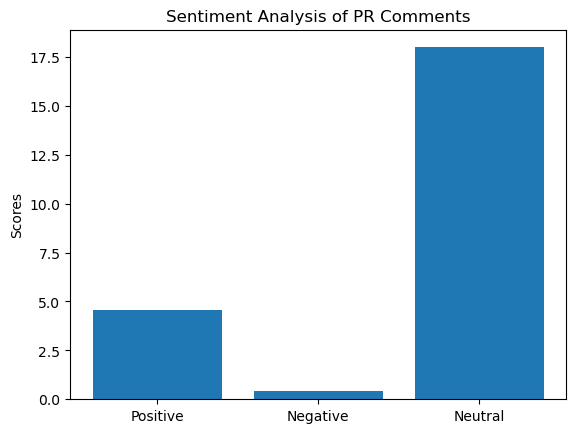

In [53]:
print('Total Neutral -> ', total_neutral)
print('Total Positive -> ', total_positive)
print('Total Negative -> ', total_negative)
print('Total Compound -> ', total_compound)

labels = ['Positive', 'Negative', 'Neutral']	
scores = [total_positive, total_negative, total_neutral]	

plt.bar(labels, scores)
plt.ylabel('Scores')
plt.title('Sentiment Analysis of PR Comments')
plt.show()